### Source Attribution  

This notebook is adapted from the **Neuromatch Academy (NMA) – Computational Neuroscience Course**,  
**Python Workshop 1 & 2** tutorial.  

Original authors: *Neuromatch Academy Contributors*  
Source:

Github : [Neuromatch Academy GitHub Repository](https://github.com/NeuromatchAcademy/course-content)  
Tutorial : [Neuromatch computational neuroscience course](https://compneuro.neuromatch.io/tutorials/intro.html)

License: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)  

> Adapted and modified by *Vaishnavi Gawale* for learning and documentation purposes as part of the **BCI Learning Series**.


#Leaky Integrate and Fire Neuron Model (LIF)

The neuron basically models the -
1. Voltage v(t)
2. Leak Term
3. Spikes



In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

### Introducing to the parameters

In [ ]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


#### Synaptic Input

In [ ]:
import numpy as np

for step in range(10):

  t = step * dt

  i = i_mean * (1 + np.sin((2 * np.pi * t) / 0.01))

  print(f'{t:.3f} , {i:.4e}')

0.000 , 2.5000e-10
0.001 , 3.9695e-10
0.002 , 4.8776e-10
0.003 , 4.8776e-10
0.004 , 3.9695e-10
0.005 , 2.5000e-10
0.006 , 1.0305e-10
0.007 , 1.2236e-11
0.008 , 1.2236e-11
0.009 , 1.0305e-10


#### Membrane Equation (LIF Neuron)-
This shows how the membrane potential evolves in time. We will simulate the evolution of the membrane equation in discrete time steps, with a sufficiently small delta t.



Simulating membrane potential

In [ ]:
step_end = 10
v = el
for step in range(step_end):

  t = step * dt
  i = i_mean * (1 + np.sin((2 * np.pi * t) / 0.01))

  v = v + (dt/tau) * (el - v + r*i)

  print(f'{t:.3f} , {v:.4e}')

0.000 , -5.8750e-02
0.001 , -5.6828e-02
0.002 , -5.4548e-02
0.003 , -5.2381e-02
0.004 , -5.0778e-02
0.005 , -4.9989e-02
0.006 , -4.9974e-02
0.007 , -5.0414e-02
0.008 , -5.0832e-02
0.009 , -5.0775e-02


### Plotting Synaptic Input Current

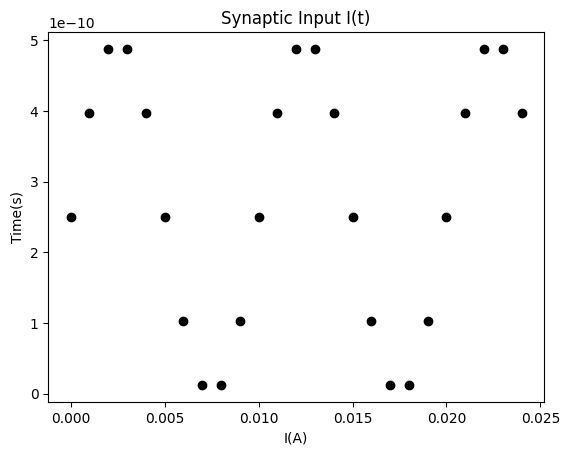

In [ ]:
import matplotlib.pyplot as plt

step_end = 25
dt = 0.001
plt.figure()
plt.title("Synaptic Input I(t)")
plt.xlabel("I(A)")
plt.ylabel("Time(s)")

for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((2 * np.pi * t) / 0.01))
  plt.plot(t, i, color='black', marker='o')

plt.show()

Plotting membrane potential

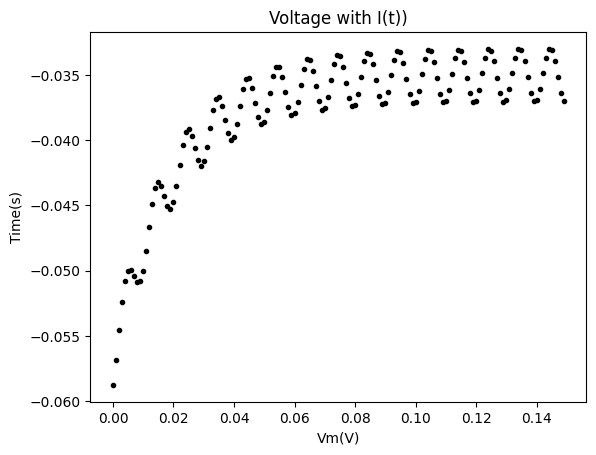

In [ ]:
step_end = int(t_max / dt)
v=el

plt.figure()
plt.title("Voltage with I(t))")
plt.xlabel("Vm(V)")
plt.ylabel("Time(s)")

for step in range(step_end):
  t = step * dt
  i = i_mean * (1 + np.sin((2 * np.pi * t) / 0.01))
  v = v + (dt/tau) * (el - v + r*i)
  plt.plot(t, v, 'k.')

plt.show()

Random synaptic input

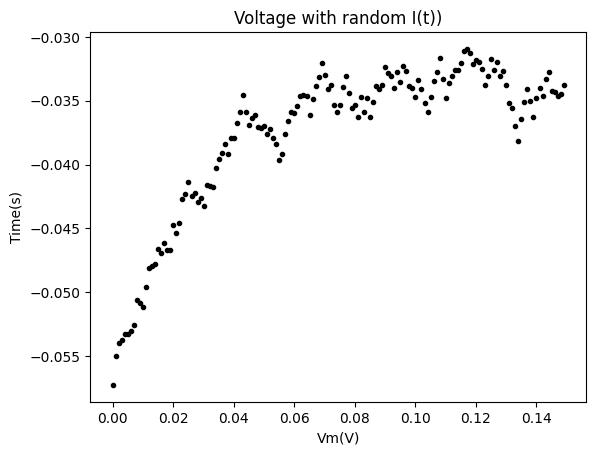

In [ ]:
np.random.seed(2020)

step_end = int(t_max / dt)
v=el

plt.figure()
plt.title("Voltage with random I(t))")
plt.xlabel("Vm(V)")
plt.ylabel("Time(s)")

for step in range(step_end):
  t = step * dt
  random_num = 2 * np.random.random() - 1
  i =  i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * random_num)
  v = v + (dt/tau) * (el - v + r*i)
  plt.plot(t, v, 'k.')

plt.show()

Multiple Realizations of Vm

Collecting the sample mean over
 realizations of N = 50 with random input

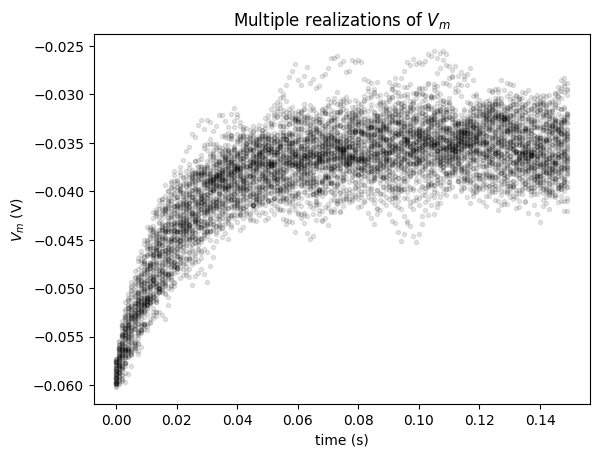

In [ ]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
  t = step * dt
  for j in range(0, n):
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    v_n[j] = v_n[j] + (dt/tau) * (el - v_n[j] + r*i)
  plt.plot(n*[t],v_n,'k.',alpha=0.1)
plt.show()


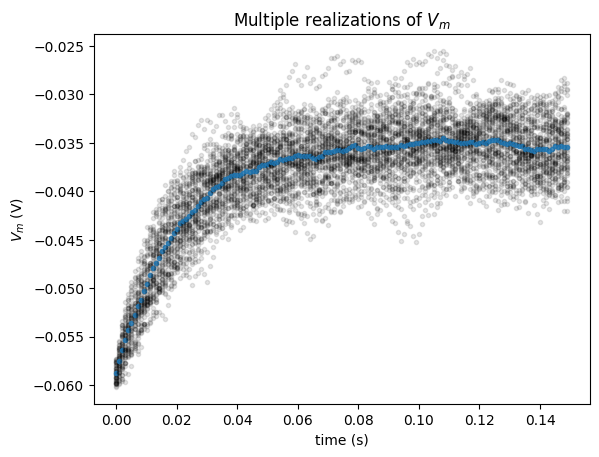

In [ ]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
  t = step * dt
  for j in range(0, n):
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    v_n[j] = v_n[j] + (dt/tau) * (el - v_n[j] + r*i)
  v_mean = np.mean(v_n)

  plt.plot(n*[t],v_n,'k.',alpha=0.1)
  plt.plot(t,v_mean,'C0.',alpha=0.8)

plt.show()

150


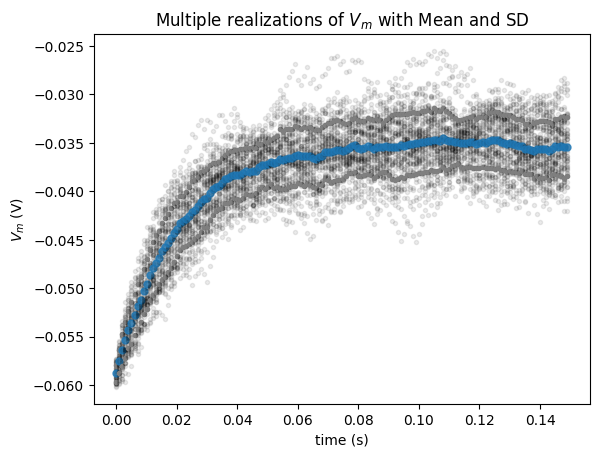

In [ ]:
np.random.seed(2020)
step_end = int(t_max / dt)
print(step_end)
n = 50
v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$ with Mean and SD')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
  t = step * dt
  for j in range(0, n):
    i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
    v_n[j] = v_n[j] + (dt/tau) * (el - v_n[j] + r*i)
  v_mean = np.mean(v_n)

  v_var_n = [(v - v_mean)**2 for v in v_n]
  v_var = sum(v_var_n) / (n - 1)
  v_std = np.sqrt(v_var)

  plt.plot(n*[t],v_n,'k.',alpha=0.08)
  plt.plot(t,v_mean,'C0.',alpha=0.8, markersize=10)
  plt.plot(t, v_mean + v_std, 'C7.', alpha=1)
  plt.plot(t, v_mean - v_std, 'C7.', alpha=1)
plt.show()

### Adding Spikes to the LIF neuron

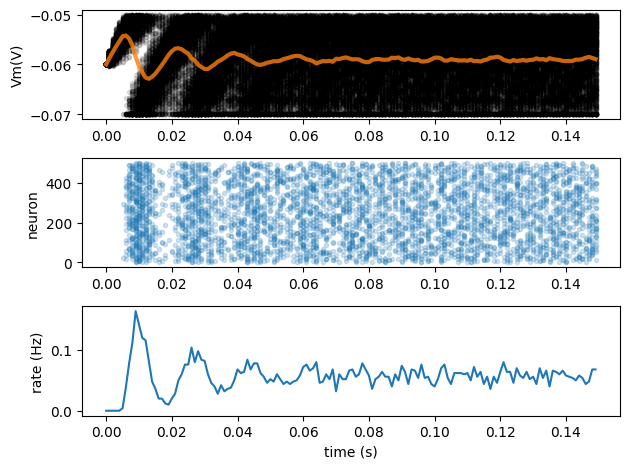

In [ ]:
np.random.seed(2020)
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

spikes = {j: [] for j in range(n)}
spikes_n = np.zeros([step_end])

for step,t in enumerate(t_range):
  if step == 0 :
    continue

  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  for j in range(n):
    if v_n[j,step] >= vth:
      v_n[j,step] = vr
      spikes[j] += [t] # Add this spike time
      spikes_n[step] += 1

v_mean = np.mean(v_n, axis=0)
spikes_mean =  spikes_n / n

plt.figure()

 # Plot simulations and sample mean
ax1 = plt.subplot(3,1,1)
for j in range(n):
  plt.scatter(t_range, v_n[j], color='k', marker='.',alpha=0.1)
plt.plot(t_range,v_mean,'C1',alpha=0.8,linewidth=3)
plt.ylabel('Vm(V)')

# Plot spikes
plt.subplot(3, 1, 2, sharex=ax1)
# for each neuron j: collect spike times and plot them at height j
for j in range(n):
  times = np.array(spikes[j])
  plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

plt.ylabel('neuron')

# Plot firing rate
plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(t_range, spikes_mean)
plt.xlabel('time (s)')
plt.ylabel('rate (Hz)')

plt.tight_layout()






In [ ]:
plt.scatter(x, y, color="k", marker=".")